# Example 3. Adaptive Boosting
---
- Indroduce the **Adaptive boosting (AdaBoost)** method to obtain strong learners from weak learners.
- Demonstrate and compare the performace between weak learners and **AdaBoost** with *1-depth decision tree* and *perceptron*.

### Import package and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score

In [2]:
le = LabelEncoder()
df_wine = pd.read_csv('../data/wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Only use class 2 and 3
df_wine = df_wine[df_wine['Class label']!=1]
y = le.fit_transform(df_wine['Class label'].values)
X = df_wine[['Alcohol', 'Hue']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [3]:
def accuracy( model, X, y ):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

In [4]:
def decision_regions( models, titles, X, y ):
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(10,5))

    for idx, clf, label in zip([0, 1], models, titles):
        clf.fit(X_train, y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axarr[idx].contourf(xx, yy, Z, alpha=0.3)
        axarr[idx].scatter( X[y==0,0], X[y==0,1], c='blue', marker='^', s=50)
        axarr[idx].scatter( X[y==1,0], X[y==1,1], c='red',  marker='o', s=50) 
        axarr[idx].set_title(label)

    axarr[0].set_ylabel('Alcohol', fontsize=12)
    plt.text(10,  -0.8, s='Hue',     ha='center', va='center', fontsize=12)
    #plt.text(4.5, 1,    s='Alcohol', ha='center', va='center', fontsize=12, rotation=90)
    plt.show()

### 1. Weak models

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.tree         import DecisionTreeClassifier

#### 1.1. 1-depth Decision tree

In [6]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree = tree.fit(X_train, y_train)
print 'Decision tree train/test accuracies: %.3f/%.3f'%( accuracy(tree, X_train, y_train), 
                                                         accuracy(tree, X_test,  y_test))

Decision tree train/test accuracies: 0.845/0.854


#### 1.2. Single Perceptron

In [7]:
pla = Perceptron(n_iter=20, eta0=0.01, random_state=0)
pla.fit(X_train, y_train)
print 'PLA train/test accuracies: %.3f/%.3f'%( accuracy(pla, X_train, y_train), 
                                               accuracy(pla, X_test,  y_test))

PLA train/test accuracies: 0.817/0.875


### 2. AdaBoosting the weak learners
#### 2.1. Training the weak learners

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
ada_tree  = AdaBoostClassifier(base_estimator=tree,
                               n_estimators=500,
                               learning_rate=0.1,
                               random_state=0)
ada_tree = ada_tree.fit(X_train, y_train)
print 'AdaBoost tree train/test accuracies: %.3f/%.3f'%(accuracy(ada_tree, X_train, y_train), 
                                                        accuracy(ada_tree, X_test,  y_test))

AdaBoost tree train/test accuracies: 1.000/0.875


In [10]:
ada_pla = AdaBoostClassifier(base_estimator=pla,
                             n_estimators=500,
                             learning_rate=0.1,
                             random_state=0,
                             algorithm='SAMME')
ada_pla = ada_pla.fit(X_train, y_train)
print 'AdaBoost tree train/test accuracies: %.3f/%.3f'%(accuracy(ada_pla, X_train, y_train), 
                                                        accuracy(ada_pla, X_test,  y_test))

AdaBoost tree train/test accuracies: 0.944/0.896


#### 2.2. Visualization of decision regions

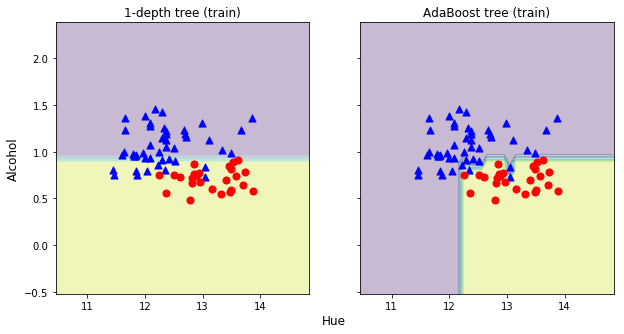

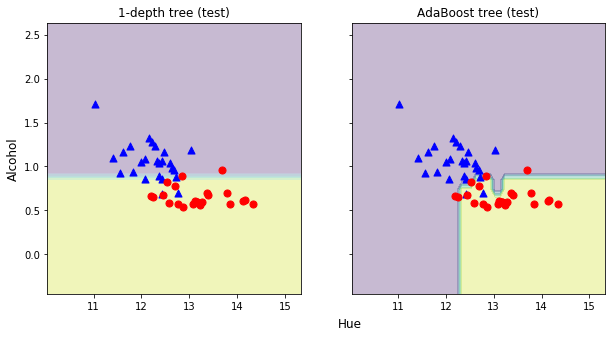

In [11]:
decision_regions([tree, ada_tree], ['1-depth tree (train)', 'AdaBoost tree (train)'], X_train, y_train)
decision_regions([tree, ada_tree], ['1-depth tree (test)', 'AdaBoost tree (test)'],   X_test, y_test)

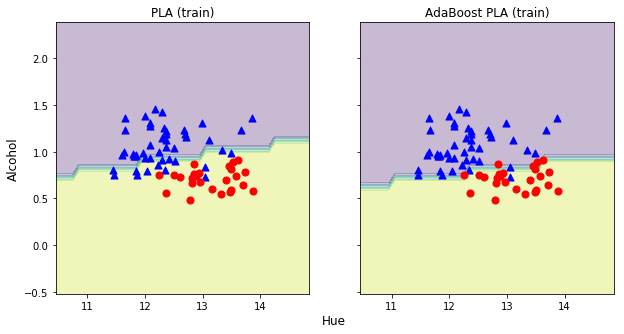

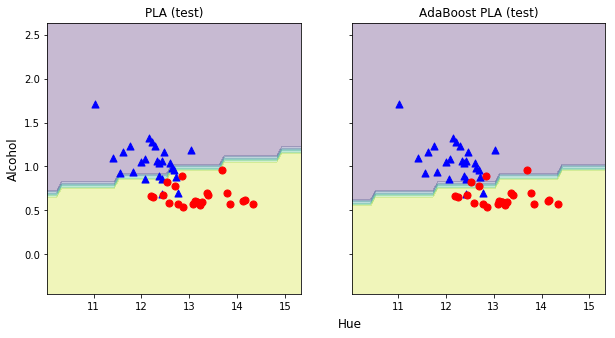

In [12]:
decision_regions([pla, ada_pla], ['PLA (train)', 'AdaBoost PLA (train)'], X_train, y_train)
decision_regions([pla, ada_pla], ['PLA (test)',  'AdaBoost PLA (test)'],  X_test, y_test)